# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

### Observable Trends
* Temperature increases as the absolute value(latitude-0) approaches 0. 
* There is no correlation between the latitude and the humidities. The highest density of the humidity readings falls between 60 to 100. The lowest humidity is approximate 0. 
* There is also no correlation between the latitude and the cloudinesss. There are strong bands near 0, 40, 78, 100.
* The wind speed cluster between 0 to 12 regardless of latitude. The city with the highest wind speed has 30 mph wind and is located at 20 latitude. 


In [88]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [89]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


663

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [90]:
url="http://api.openweathermap.org/data/2.5/weather?"
units="Imperial"

city_new=[]
clouds=[]
countries=[]
dates=[]
humidities=[]
lats=[]
lons=[]
temps=[]
winds=[]


print ("Beginning Data Retrieval")
print ("-----------------------------")

#initial record and set 
record=0
sets=1



for city in cities:
    try:
        #replace space with "&"
        query_url=url+"units="+units+"&APPID="+api_key+"&q="+city.replace(" ","&")
        response=requests.get(query_url).json()
        city_new.append(response['name'])
        clouds.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lons.append(response['coord']['lon'])
        temps.append(response['main']['temp_max'])
        winds.append(response['wind']['speed'])
        if sets==1:
            record+=1
            print (f"Processing Record {record} of Set {sets} | {city}") 
            if record==50:
                sets+=1
                record=0
        else:
            print (f"Processing Record {record} of Set {sets} | {city}")
            record+=1
            if record>49:
                sets+=1
                record=0
                
    except:
        print ("City not found. Skipping...")
    


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | hithadhoo
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | saskylakh
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | port elizabeth
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | provideniya
City not found. Skipping...
Processing Record 8 of Set 1 | nazareth
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | baruun-urt
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | kavieng
Processing Record 13 of Set 1 | qaanaaq
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | kirakira
Processing Record 16 of Set 1 | upernavik
Processing Record 17 of Set 1 | yunyang
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | necochea
Processing Record 20 of Set 1 | bur gabo
Processing Record 21 of Set 1 | avarua
Processing Record 22 of Set 1 | cartagena
Processing Re

Processing Record 31 of Set 4 | abaza
Processing Record 32 of Set 4 | marystown
Processing Record 33 of Set 4 | aklavik
Processing Record 34 of Set 4 | tessalit
Processing Record 35 of Set 4 | antofagasta
City not found. Skipping...
Processing Record 36 of Set 4 | troitsko-pechorsk
Processing Record 37 of Set 4 | goderich
Processing Record 38 of Set 4 | kloulklubed
Processing Record 39 of Set 4 | vieste
Processing Record 40 of Set 4 | lata
City not found. Skipping...
Processing Record 41 of Set 4 | richards bay
Processing Record 42 of Set 4 | jamestown
Processing Record 43 of Set 4 | weligama
Processing Record 44 of Set 4 | sur
Processing Record 45 of Set 4 | norman wells
Processing Record 46 of Set 4 | atbasar
Processing Record 47 of Set 4 | rawson
Processing Record 48 of Set 4 | batticaloa
City not found. Skipping...
Processing Record 49 of Set 4 | faya
Processing Record 0 of Set 5 | almeirim
Processing Record 1 of Set 5 | viesca
Processing Record 2 of Set 5 | torbay
Processing Recor

Processing Record 18 of Set 8 | leua
Processing Record 19 of Set 8 | bonavista
Processing Record 20 of Set 8 | cayenne
Processing Record 21 of Set 8 | santa marta
Processing Record 22 of Set 8 | ilulissat
City not found. Skipping...
Processing Record 23 of Set 8 | saint-augustin
Processing Record 24 of Set 8 | changuinola
Processing Record 25 of Set 8 | mobile
Processing Record 26 of Set 8 | yulara
Processing Record 27 of Set 8 | chadiza
Processing Record 28 of Set 8 | luganville
Processing Record 29 of Set 8 | hamilton
Processing Record 30 of Set 8 | high level
Processing Record 31 of Set 8 | potiskum
Processing Record 32 of Set 8 | grayvoron
Processing Record 33 of Set 8 | pacifica
Processing Record 34 of Set 8 | edd
Processing Record 35 of Set 8 | kunashak
Processing Record 36 of Set 8 | leeton
Processing Record 37 of Set 8 | gombe
Processing Record 38 of Set 8 | fort-shevchenko
Processing Record 39 of Set 8 | kajaani
City not found. Skipping...
Processing Record 40 of Set 8 | romny

City not found. Skipping...
Processing Record 3 of Set 12 | roald
City not found. Skipping...
Processing Record 4 of Set 12 | itaiba
Processing Record 5 of Set 12 | mayo
Processing Record 6 of Set 12 | belyy yar
Processing Record 7 of Set 12 | manbij
Processing Record 8 of Set 12 | bambanglipuro
Processing Record 9 of Set 12 | omsukchan
Processing Record 10 of Set 12 | gat
Processing Record 11 of Set 12 | puerto escondido
Processing Record 12 of Set 12 | solnechnyy
City not found. Skipping...
Processing Record 13 of Set 12 | randers
Processing Record 14 of Set 12 | pemagatsel
Processing Record 15 of Set 12 | gaomi
Processing Record 16 of Set 12 | bronnoysund
Processing Record 17 of Set 12 | sangar
Processing Record 18 of Set 12 | guerrero negro
Processing Record 19 of Set 12 | fairbanks
Processing Record 20 of Set 12 | katherine
Processing Record 21 of Set 12 | belaya gora
Processing Record 22 of Set 12 | parole
Processing Record 23 of Set 12 | kalat
Processing Record 24 of Set 12 | qu

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [91]:
weather=pd.DataFrame({
    "city":city_new,
    "Cloudiness":clouds,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lons,
    "Max Temp":temps,
    "Wind Speed":winds
})

weather.count()

city          591
Cloudiness    591
Country       591
Date          591
Humidity      591
Lat           591
Lng           591
Max Temp      591
Wind Speed    591
dtype: int64

In [93]:
weather.to_csv(output_data_file,index=None, header=True)
weather.head()

,city,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hithadhoo,2,MV,1563064523,75,-0.60,73.08,83.57,11.61
1,Bethel,90,US,1563064523,63,60.79,-161.76,64.40,4.70
2,Saskylakh,0,RU,1563063964,47,71.97,114.09,55.13,10.02
3,Mataura,99,NZ,1563063945,95,-46.19,168.86,45.00,11.01
4,Port,72,CD,1563063946,61,-7.04,29.76,63.05,3.53


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

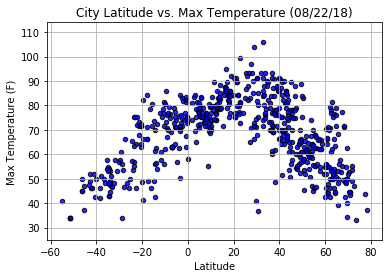

In [108]:
weather.plot(kind="scatter",x="Lat",y="Max Temp",
             color="blue",edgecolors="black",alpha=0.85,
            title="City Latitude vs. Max Temperature (08/22/18)")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.ylim(25,114)
plt.grid()

#save the figure
plt.savefig("output_figure/Latitude_vs_maxTemp.png")

plt.show()

#### Latitude vs. Humidity Plot

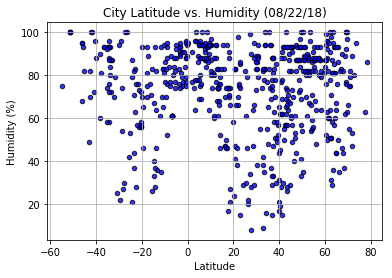

In [109]:
weather.plot(kind="scatter",x="Lat",y="Humidity",
             color="blue",edgecolors="black",alpha=0.80,
            title="City Latitude vs. Humidity (08/22/18)")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.grid()

#save the figure
plt.savefig("output_figure/Latitude_vs_humidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

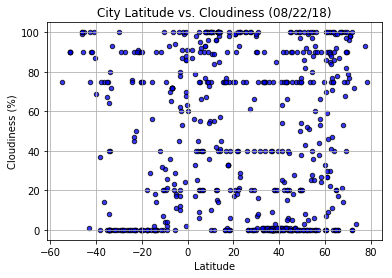

In [110]:
weather.plot(kind="scatter",x="Lat",y="Cloudiness",
             color="blue",edgecolors="black",alpha=0.78,
            title="City Latitude vs. Cloudiness (08/22/18)")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.grid()

#save the figure
plt.savefig("output_figure/Latitude_vs_cloudiness.png")

plt.show()

#### Latitude vs. Wind Speed Plot

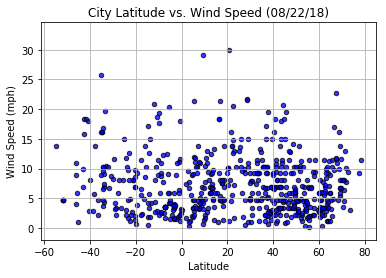

In [114]:
weather.plot(kind="scatter",x="Lat",y="Wind Speed",
             color="blue",edgecolors="black",alpha=0.78,
            title="City Latitude vs. Wind Speed (08/22/18)")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.ylim(-2,34.6)
plt.grid()

#save the figure
plt.savefig("output_figure/Latitude_vs_windSpeed.png")

plt.show()